=== Домашняя работа №2 ===
--- Первые строки данных ---
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
Информация о столбцах и типах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
Базовые описательные статистики
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11

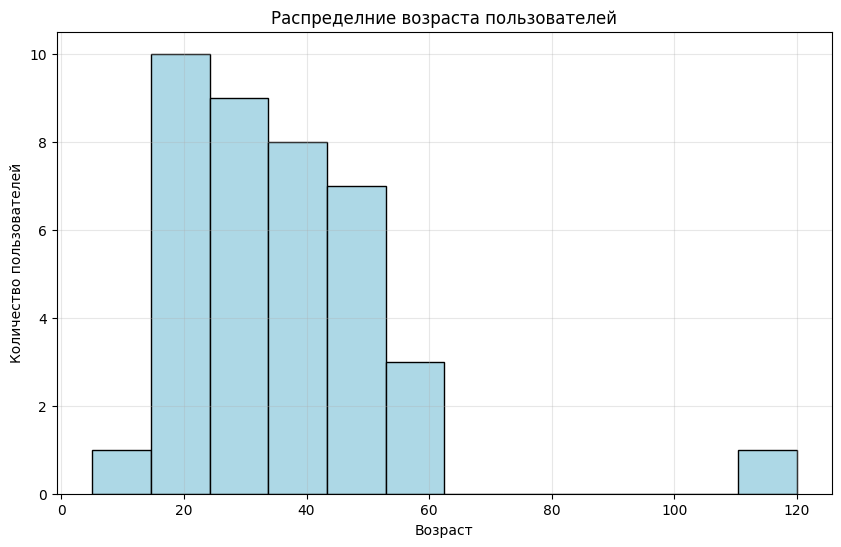

 Показано распределение возраста пользователей
 Основная масса пользователей 20-40 лет
 Видны выбросы в данных

2. Боксплот: Выручка по странам


<Figure size 1000x600 with 0 Axes>

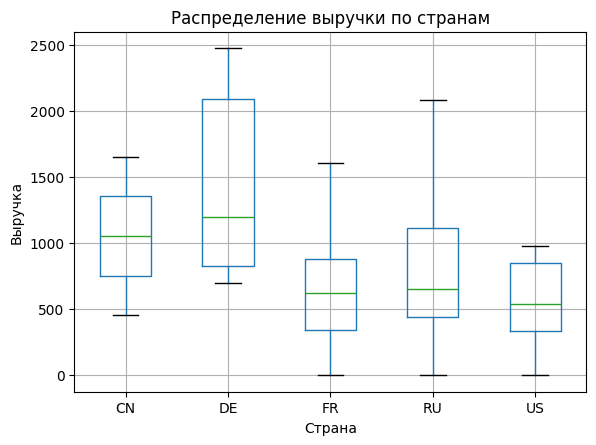

 Сравнение распределения выручки между странами
 Германия показывает наибольшую медианную выручку
 Видны выбросы в нескольких странах

3. Диаграмма рассеяния: Зависимость выручки от покупок


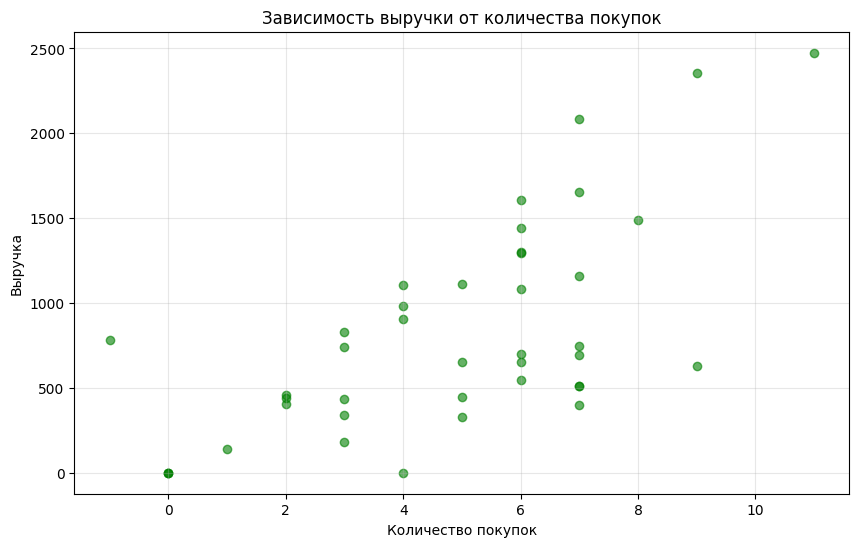

 Показана зависимость между покупками и выручкой
 Наблюдается положительная корреляция
 Видны аномальные точки



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# 2.3.1. Загрузка данных и первичный осмотр
print("=== Домашняя работа №2 ===")
df = pd.read_csv('S02-hw-dataset.csv')
print("--- Первые строки данных ---")
print(df.head())
print("Информация о столбцах и типах")
df.info()
print("Базовые описательные статистики")
print(df.describe())

# 2.3.2. Пропуски, дубликаты и базовый контроль качества
print("=== Контроль качества данных ===")
print('\n--- Анализ пропусков ---')
missing_data = df.isna().sum()
missing_percent = df.isna().mean()*100
df.duplicated().sum()
missing_info = pd.DataFrame({'Количество пропусков': missing_data, 'Процент пропусков': missing_percent.round(2)})
print(missing_info)
print("\n--- Анализ дубликатов ---")
print(f"Полных дубликатов строк: {df.duplicated().sum()}")
print(f"Дубликатов user_id: {df['user_id'].duplicated().sum()}")
if df['user_id'].duplicated().sum() > 0:
    print("\nДублирующиеся user_id:")
    duplicates = df[df['user_id'].duplicated(keep=False)]  
    print(duplicates[['user_id', 'age', 'country', 'purchases', 'revenue']])
#2.3.2.3
print("\n--- Поиск подозрительных значений ---")

print("\n 1) Нереалистичный возраст")
suspicious_age = df[(df['age'] < 18) | (df['age'] > 80)]
if not suspicious_age.empty:
    print(suspicious_age[['user_id', 'age', 'country']])
else:
    print("Не найдено")
print("\n 2) Отрицательное количество покупок:")
negative_purchases = df[df['purchases'] < 0]
if not negative_purchases.empty:
    print(negative_purchases[['user_id', 'purchases', 'revenue']])
else:
    print("Не найдено")
print("\n 3) Нулевой revenue при ненулевых purchases:")
suspicious_revenue = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
if not suspicious_revenue.empty:
    print(suspicious_revenue[['user_id', 'purchases', 'revenue']])
else:
    print("Не найдено")

#2.3.2.4
print("Выводы по качеству данных")
print("""
ОБНАРУЖЕННЫЕ ПРОБЛЕМЫ КАЧЕСТВА ДАННЫХ:

1. Пропуски в данных:
   - В столбце 'age' обнаружено 2 пропуска (пользователи user_id 5 и 13)
   - Это составляет примерно 5% от всех записей в этом столбце
   - Остальные столбцы не содержат пропусков

2. Дубликаты:
   - Обнаружен дубликат user_id (пользователь с id 10 встречается дважды)
   - Полных дубликатов строк не найдено

3. Нереалистичные значения**:
   - Найден пользователь с возрастом 120 лет (user_id 6) - явная ошибка данных
   - Обнаружен пользователь возрастом 5 лет (user_id 21) - слишком молод для самостоятельных покупок
   - Найдено отрицательное количество покупок (-1) у user_id 6
      """)

# 2.3.3. Базовый EDA: группировки, агрегаты и частоты
print("=== EDA - Анализ Данных ===")
print("1. Частоты для категориальных переменных")
print("Распределение по странам")
country_counts = df['country'].value_counts()
country_percent = df['country'].value_counts(normalize = True)*100
country_summary = pd.DataFrame({
    'Количество': country_counts,
    'Процент': country_percent.round(1)
})
print(country_summary)

print("2. Группировка с агрегатами по странам")
country_analysis = df.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases' : ['mean', 'sum', 'max'],
    'revenue' : ['mean', 'sum', 'max']
})
country_analysis.columns = [
    'Ср. возраст', 'Медиана возраста', 'Кол-во пользователей',
    'Ср. покупки', 'Всего покупок', 'Макс покупок',
    'Ср. выручка', 'Общая выручка', 'Макс выручка'
]

print(country_analysis)

print("3. Группировка на возрастные группы")
df['age_group'] = pd.cut(df['age'], bins = [0,20,30,40,50,100], 
                        labels = ['<20', '20-30', '30-40', '40-50', '50+'])
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)
print("4. Основные наблюдения")
print("""
1. Россия доминирует по количеству пользователей 
2. Основная масса пользователей 20-40 лет
3. Средние показатели выручки и покупок различаются между странами
4. Германия показывает высокие средние показатели при небольшом количестве пользователей
5. Наблюдаются аномалии в данных, требующие очистки
""")
# 2.4. Визуализация данных в Matplotlib

print("===Визуализация данных ===")
print("1. Гистограмма: Распределение возраста")

plt.figure(figsize=(10,6))
plt.hist(df['age'].dropna(), bins = 12, color = 'lightblue', edgecolor = 'black')
plt.title('Распределние возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(True, alpha=0.3)
plt.savefig('figures/age_histogram.png')
plt.show()
print(" Показано распределение возраста пользователей")
print(" Основная масса пользователей 20-40 лет")
print(" Видны выбросы в данных\n")

print("2. Боксплот: Выручка по странам")

plt.figure(figsize=(10, 6))
df.boxplot(column = 'revenue', by='country')
plt.title('Распределение выручки по странам')
plt.suptitle('')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.savefig('figures/revenue_boxplot.png')
plt.show()
print(" Сравнение распределения выручки между странами")
print(" Германия показывает наибольшую медианную выручку")
print(" Видны выбросы в нескольких странах\n")

print("3. Диаграмма рассеяния: Зависимость выручки от покупок")

plt.figure(figsize=(10,6))
plt.scatter(df['purchases'], df['revenue'], alpha=0.6, color = 'green')
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.grid(True, alpha = 0.3)
plt.savefig('figures/scatter_plot.png')
plt.show()
print(" Показана зависимость между покупками и выручкой")
print(" Наблюдается положительная корреляция")
print(" Видны аномальные точки\n")

















